## Problem Statement

Predicting the number of bookings of shared bikes based on various features related to season & weather 
To identify & understand factors affecting the demand of shared bikes.  The insights can be used for business planning.

### Major steps involved: 

Data understanding

Data visualization (using various summaries & plots)

Data preparation

Building model & it's evaluation


### 1. Data understanding


In [150]:
#Import required resources


# For statistics & model building

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# For dataframe & numpy array / methods

import pandas as pd

import numpy as np

# For plotting

import matplotlib.pyplot as plt
import seaborn as sns

#Warning filter

import warnings

warnings.filterwarnings('ignore')


In [151]:
# Reading the file (csv to dataframe)

df = pd.read_csv("day.csv")

In [152]:
# Review first few records

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [153]:
# Get detiled statistics of numeric variables in dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [154]:
# Review number of rows & columns.
# See the column names

print(df.shape)
print(df.columns)

(730, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [155]:
# Overall summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### After understanding the data dictionary carefully, the following manipulations are required

a. Assigning string values to seasons, months & weekdays.  These are provided as numeric values.
(These values may be misinterpreted during modelling as order)
b.

In [156]:
# Change season values to string as : 1=spring, 2= summer, 3= fall & 4 = winter

df.loc[(df['season'] == 1) , 'season'] = 'spring'

df.loc[(df['season'] == 2) , 'season'] = 'summer'

df.loc[(df['season'] == 3) , 'season'] = 'fall'

df.loc[(df['season'] == 4) , 'season'] = 'winter'

In [157]:
# Check season wise counts

df['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [158]:
# Weather situation shown by variable weathersit has values as follows (from good to bad in 4 incremental stages): 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# Let us change the weather situation categories from numbers to string names 
# 1= grade1, 2= grade2, 3= grade3, 4= grade4

# Change season values to string as : 1=spring, 2= summer, 3= fall & 4 = winter
df.loc[(df['weathersit'] == 1) , 'weathersit'] = 'grade1'

df.loc[(df['weathersit'] == 2) , 'weathersit'] = 'grade2'

df.loc[(df['weathersit'] == 3) , 'weathersit'] = 'grade3'

df.loc[(df['weathersit'] == 4) , 'weathersit'] = 'grade4'

In [159]:
# Check weather grade wise counts

df['weathersit'].astype('category').value_counts()

# Observation: No days in weathersit = 4 (grade4)

grade1    463
grade2    246
grade3     21
Name: weathersit, dtype: int64

In [160]:
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying to mnth column

df[['mnth']] = df[['mnth']].apply(object_map)

In [161]:
# Check month names & counts to verify
df['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [162]:
# Change weekday values to string. After crosschecking with calendar, it is oberved that the values 0-6 start from Tuesday & end on Monday.  
# Hence function applies values accordingly

def str_map(x):
    return x.map({0: 'Tues', 1: 'Wed', 2: 'Thu', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'})

# Applying the function to the two columns
df[['weekday']] = df[['weekday']].apply(str_map)

In [163]:
# Check weekday names & counts to verify

df['weekday'].astype('category').value_counts()

Mon     105
Tues    105
Wed     105
Sat     104
Sun     104
Thu     104
Fri     103
Name: weekday, dtype: int64

In [164]:
# Holiday wise & Year wise counts.  It is noted that year 2018 is given value 0 & 2019 is given a value of 1

print(df['holiday'].astype('category').value_counts());

df['yr'].astype('category').value_counts()


0    709
1     21
Name: holiday, dtype: int64


0    365
1    365
Name: yr, dtype: int64

In [165]:
# Value count by field workingday to verify.  
# It is seen that the days which are not a holiday including weekend, are marked as workingdays

df['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [166]:
# Conversion of dteday from date to datetime format to avoid ambiguity in DD-MM or MM-DD formats

df['dteday']=df['dteday'].astype('datetime64')

### 2. Visualisation of data

#### View distribution of various features.  Check if it fits the normal distribution pattern
#### Identify correlations between some predictors with output variable
#### Check for multicollinearity between predictor variables

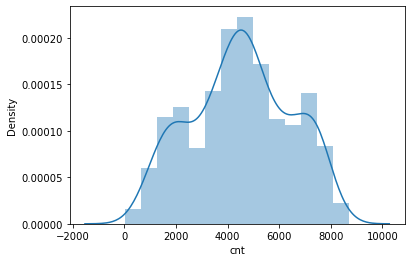

In [122]:
# First lets check distribution of output variable (Target variable) y = cnt

sns.distplot(df['cnt'])
plt.show()

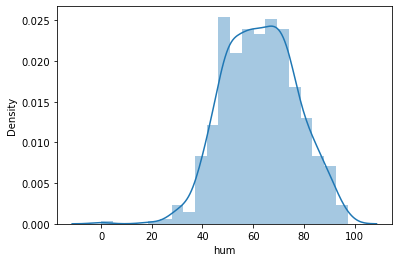

In [65]:
# Humidity

sns.distplot(df['hum'])
plt.show()

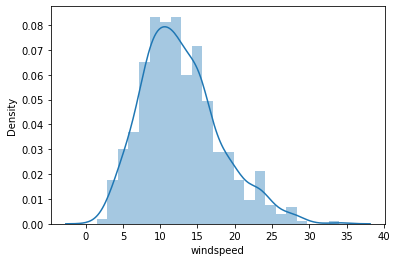

In [66]:
# Windspeed

sns.distplot(df['windspeed'])
plt.show()

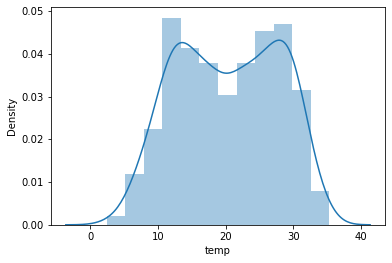

In [67]:
# Tempratue (Actual temperature)

sns.distplot(df['temp'])
plt.show()

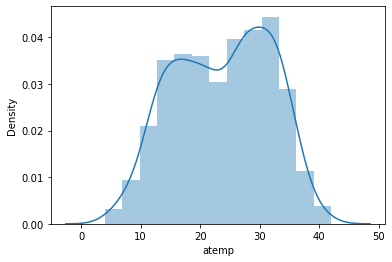

In [68]:
# Temperature (Feeling Tempratues or temperature corrected for windchill factor)

sns.distplot(df['atemp'])
plt.show()

In [43]:
# Select categorical variables by filtering float, datetime & integer

df_categoricalvars =df.select_dtypes(exclude=['float64','datetime64','int64'])

In [44]:
# Check cateforical column names

df_categoricalvars.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [45]:
# View actual categorical columns

df_categoricalvars

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,grade2
1,spring,Jan,Tues,grade2
2,spring,Jan,Wed,grade1
3,spring,Jan,Thu,grade1
4,spring,Jan,Fri,grade1
...,...,...,...,...
725,spring,Dec,Sat,grade2
726,spring,Dec,Sun,grade2
727,spring,Dec,Mon,grade2
728,spring,Dec,Tues,grade1


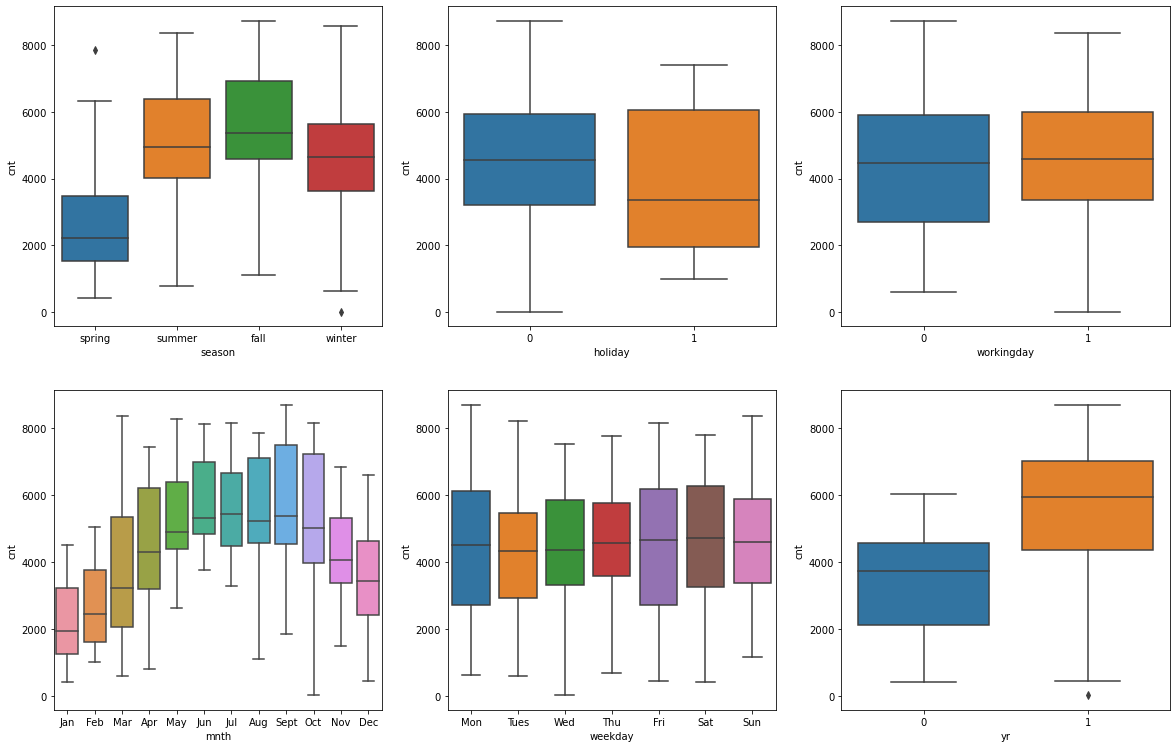

In [167]:
# Visualising all categorical variables

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

# Observation based on these plots:
# Value of cnt is visibly related to season, holiday, mnth & yr.

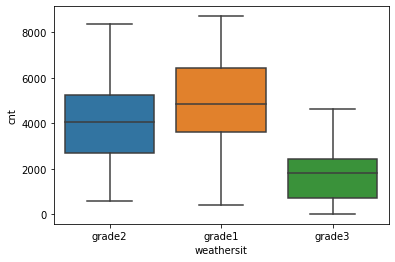

In [168]:
# Box plot for weather situation

sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()


In [46]:
# Numeric variables: Visualisation using pairplots


# Before that conversion of data type for some variables is required to separate yr, holiday, workingday etc which are 
# actually categorical, but have numeric (binary) values assigned

# Variables "casual","registered" and "cnt" to be changed from numeric variables to float.

NumVariableList = ["casual","registered","cnt"]

for var in NumVariableList:
    df[var] = df[var].astype("float")

In [48]:
# All numeric variables, excluding categorical having numeric values (we converted nummeric variables to float64 earlier)

numeric_df = df.select_dtypes(include=['float64'])
numeric_df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


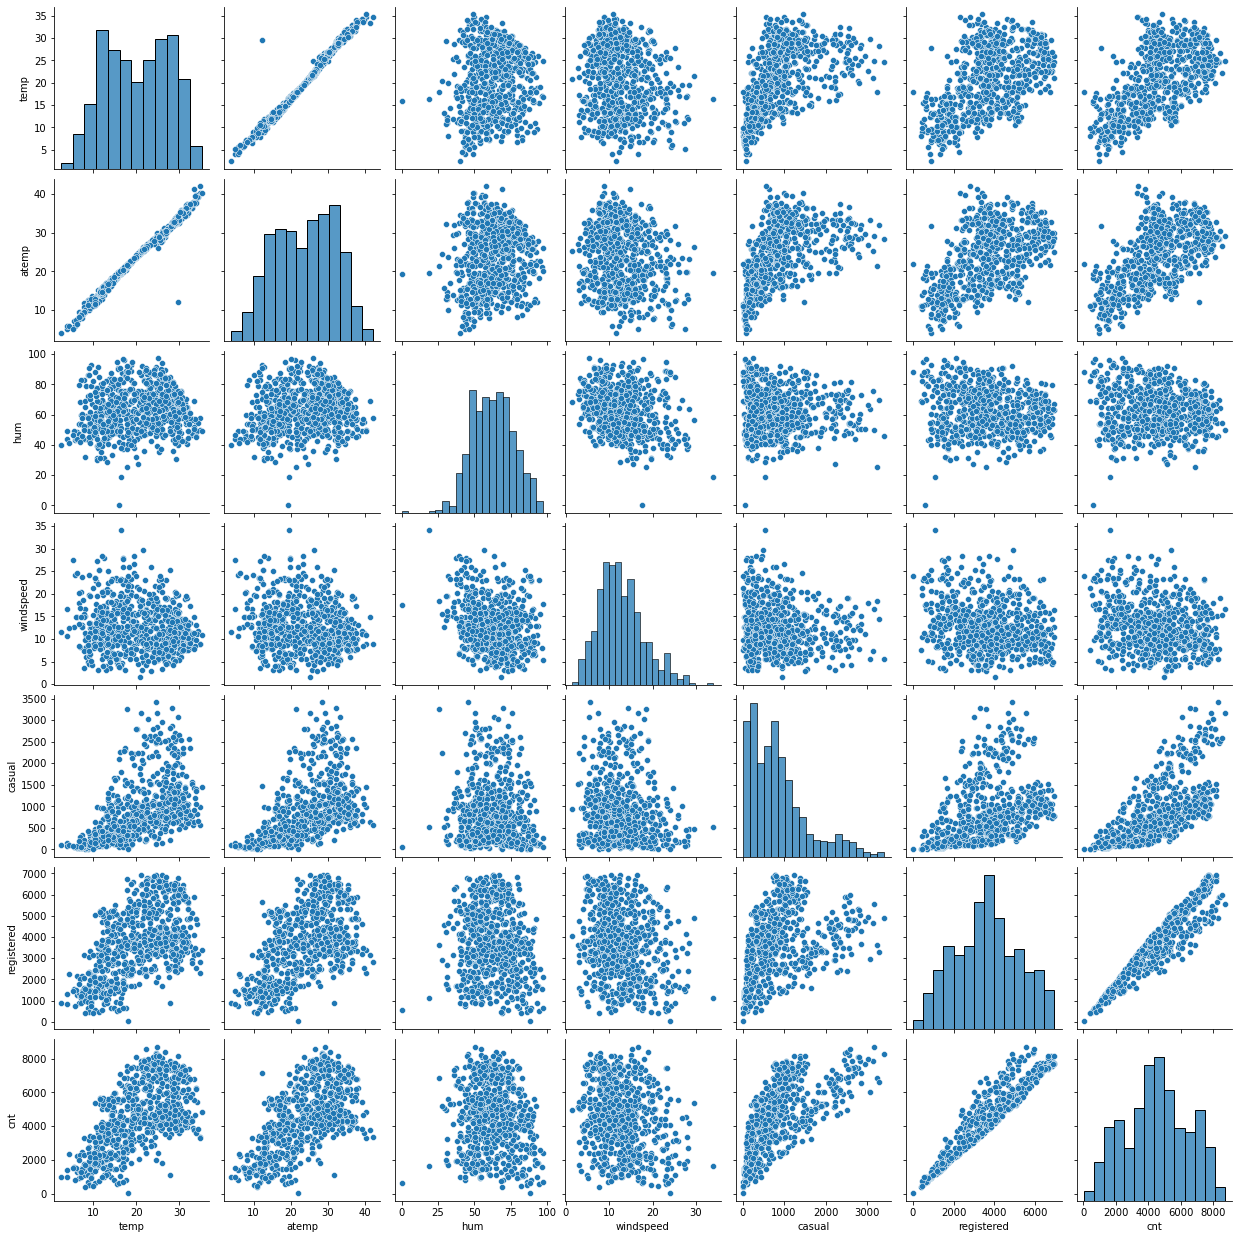

In [49]:
# Pairplot (scatter)
sns.pairplot(numeric_df)
plt.show()

In [50]:
# See the correlation matrix

cormat = numeric_df.corr()
cormat

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

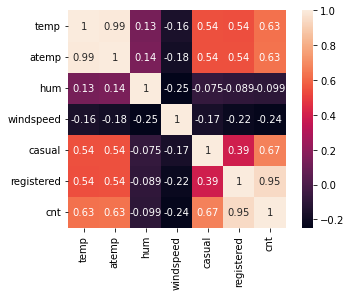

In [55]:
# Plot the heatmap

sns.heatmap(cormat, square=True, annot=True)

In [56]:
# atemp (feeling temperature) is highly correlated with temp (actual temperature)
# Drop atemp to avoid high multicollinearity

df.drop('atemp',axis=1,inplace=True)

### 3. Data preparation

#### Prepare the data & begin to build the model

In [57]:
# Select all categorical variables in a new dataframe

categorical_df=df.select_dtypes(include=['object'])

In [58]:
# Check the categorical dataframe

categorical_df

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,grade2
1,spring,Jan,Tues,grade2
2,spring,Jan,Wed,grade1
3,spring,Jan,Thu,grade1
4,spring,Jan,Fri,grade1
...,...,...,...,...
725,spring,Dec,Sat,grade2
726,spring,Dec,Sun,grade2
727,spring,Dec,Mon,grade2
728,spring,Dec,Tues,grade1


In [59]:
# Convert categorical variables into dummies

df_dummies = pd.get_dummies(categorical_df, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Now that dummy variables are created for categorical variables, we can drop original categorical variable columns
df = df.drop(list(categorical_df.columns), axis=1)

In [61]:
# Add (attach) newly dummy variables with the original dataframe by concat()
df = pd.concat([df, df_dummies], axis=1)

In [62]:
# View few rows of dataframe after this change

df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# 'instant' and 'dteday' columns are not significant for analysis.  Hence drop them.

df =df.drop(['instant','dteday'], axis = 1, inplace = False)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


### 4. Building the model

#### Beginning of building the model & it's evaluation.


In [130]:
# Test train split after importing train_test_split (ratio 70:30)

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [131]:
# View training dataset
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


In [66]:
# Scaling of numeric variables for better interpretation of coefficients.
# Use MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply to all the numerical columns (i.e. except categorical & dummies)

var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [67]:
# View training dataset again after scaling

df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,1,0,0,0,0,0,1,0


In [68]:
# Statistics of training dataset

df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


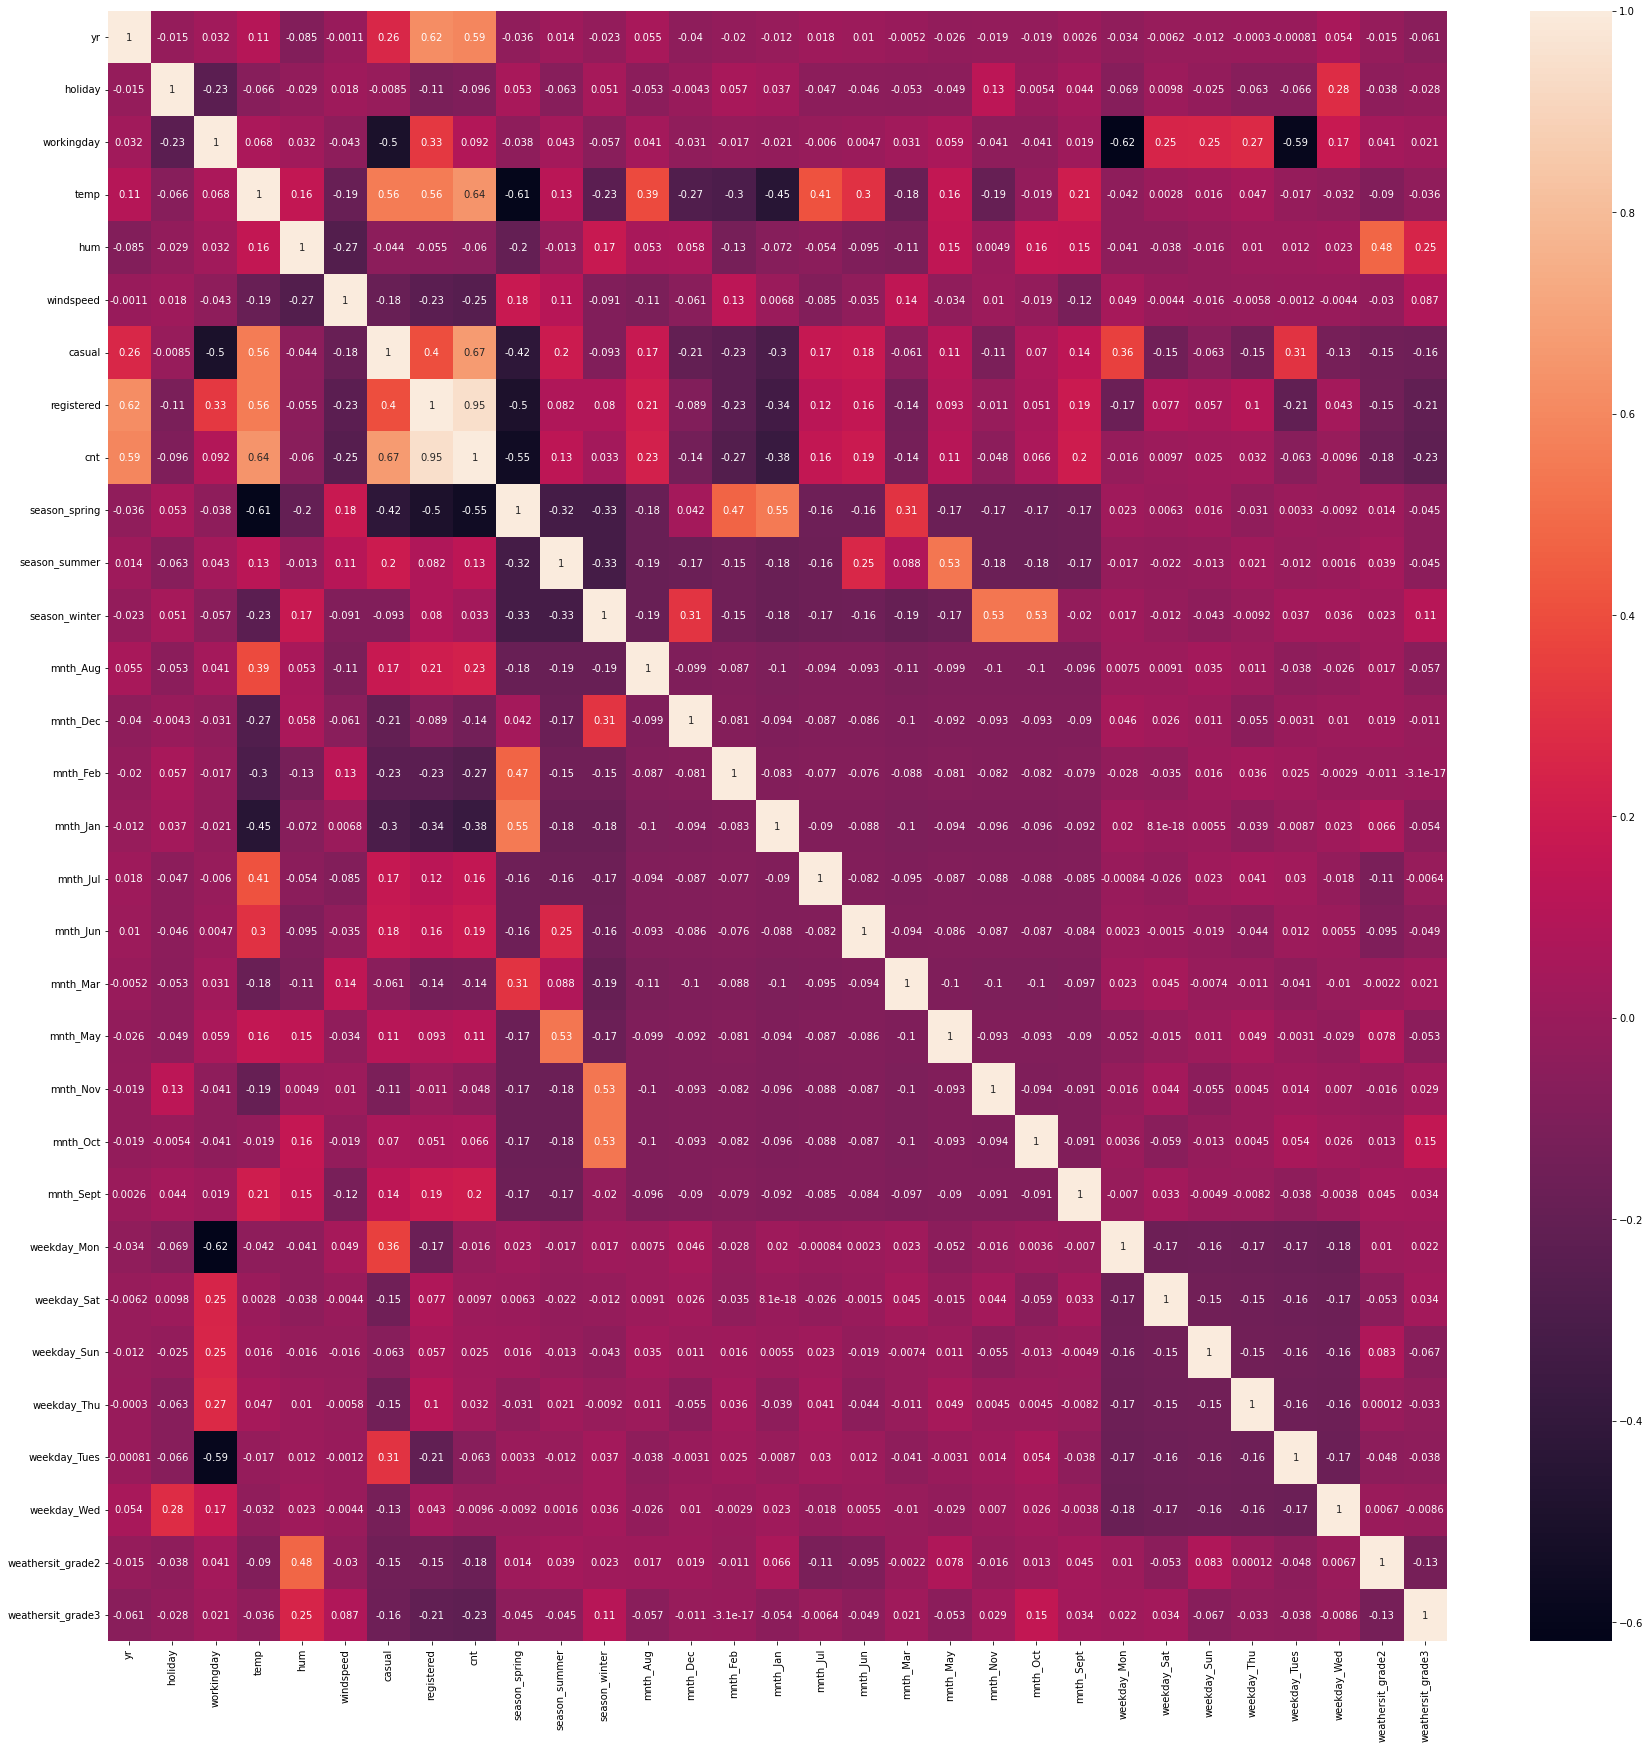

In [69]:
# Check if any variables are highly correlated with each other

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

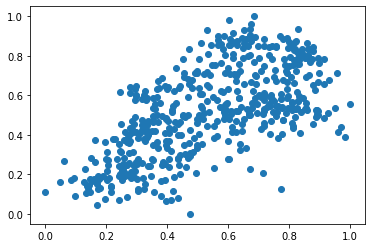

In [70]:
# Observation: casual & registered are most closely correlated to cnt & in fact they add up to make cnt
# After casual & registered, temp is the most correlated variable with cnt
# View a scattered pairplot of temp & cnt\

plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [83]:
# Split X training & y training sets
# Drop casual & registered as they are highly correlated to cnt & will cause multicollinearity & create X train set

X_train = df_train.drop(["casual","registered"],axis=1)
y_train = df_train.pop('cnt')

In [84]:
# View X train set top few rows

X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [73]:
# Convert the variables into array before fitting the model to avoid any error
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [85]:
# Build first model using statsmodels & check it
# import statsmodels api

import statsmodels.api as sm

# Statsmodels does not have intercept in built & constant needs to be added in X train dataset.  
# Let's name new dataset as X_train_lm 

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                0.242930
yr                   0.232116
holiday              0.006726
workingday           0.093651
temp                 0.450562
hum                 -0.151340
windspeed           -0.186453
season_spring       -0.048159
season_summer        0.038725
season_winter        0.105847
mnth_Aug             0.014404
mnth_Dec            -0.045586
mnth_Feb            -0.032282
mnth_Jan            -0.062777
mnth_Jul            -0.040350
mnth_Jun            -0.002972
mnth_Mar             0.001045
mnth_May             0.023940
mnth_Nov            -0.041851
mnth_Oct             0.007534
mnth_Sept            0.081060
weekday_Mon          0.098544
weekday_Sat         -0.003849
weekday_Sun          0.005388
weekday_Thu         -0.013502
weekday_Tues         0.044008
weekday_Wed         -0.015519
weathersit_grade2   -0.061066
weathersit_grade3   -0.257443
dtype: float64

In [86]:
# Instantiate linear regression & fit
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [87]:
# Check the intercept & coefficients
print(lm.intercept_)
print(lm.coef_)

0.303661877052977
[ 0.23211572 -0.05400605  0.03291909  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859  -0.03228181
 -0.06277659 -0.04035007 -0.00297239  0.00104515  0.02393995 -0.04185131
  0.00753359  0.0810599   0.03781128 -0.00384924  0.00538751 -0.01350234
 -0.01672432 -0.01551922 -0.0610664  -0.25744279]


In [88]:
# Summary of first cut model

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.74e-182
Time:                        13:22:08   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2429      0.035      6.854      0.000       0.173       0.313
yr                    0.2321      0.008     28.820      0.000       0.216       0.248
holiday               0.0067      0.024      0.278      0.781      -0.041       0.054
workingday            0.0937      0.012      7.783      0.000       0.070       0.117
temp                  0.4506      0.046      9.734      0.000       0.360       0.542
hum                  -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed            -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring        -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer         0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter         0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug              0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec             -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb             -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan             -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul             -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun             -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar              0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May              0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov             -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct              0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept             0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon           0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat          -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun           0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thu          -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues          0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed          -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_grade2    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_grade3    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:      

#### Observations: Adjusted R-squared value of first model above is 84.5% 
#### This shows good significance. However we will try to reduce the number of features (to reduce complexity / overfitting) by excluding those which are not relevant in explaining the outcome (cnt) 

In [89]:
# Remove features using RFE (automated approach to begin with.  We may fine tune manually in the end)
#Import resources

from sklearn.feature_selection import RFE

# Use RFE to target to have 15 features selected

lm = LinearRegression()

rfe1 = RFE(lm, n_features_to_select =15)

# Fit

rfe1.fit(X_train, y_train)

print(rfe1.support_)           
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


In [90]:
# Use statsmodels for summary of newly created model (modified with lesser variables)
import statsmodels.api as sm

# Features that were selected by RFE (RFE support)

varcol = X_train.columns[rfe1.support_]

# Training data for 15 selected columns

X_train_rfe1 = X_train[varcol]

# Add a constant to the statsmodel

X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Mon,weathersit_grade2,weathersit_grade3
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [91]:
# Fitting the modified model with 15 variables selected by RFE.  Let's name it lm1

lm1 = sm.OLS(y_train, X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.31e-191
Time:                        13:33:30   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.036      6.949      0.000       0.180       0.322
yr                    0.2305      0.008     28.807      0.000       0.215       0.246
holiday              -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday            0.0435      0.012      3.781      0.000       0.021       0.066
temp                  0.5098      0.034     14.851      0.000       0.442       0.577
hum                  -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed            -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring        -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer         0.0497      0.015      3.346      0.001       0.020       0.079
season_winter         0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan             -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul             -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sept             0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Mon           0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_grade2    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_grade3    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations: Adjusted R-squared value of this second model with only 15 features is 84.4% 
#### which is alsmost similar to earlier value of 84.5% with all features.  Thus there is no significant reduction in adjusted
#### R squared value with this reduction in features, which is good.

In [94]:
# We also need to see the VIF values of the features.  This will provide correlation between each predictor variable with other
#predictor variables
# import VFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Drop the constant introduced earlier from X train (rfe1)

vara =X_train_rfe1.drop('const',axis=1)

In [95]:
# VIF table (dataframe) creation.  Let's name it vifa

vifa = pd.DataFrame()

vifa['Features'] = vara.columns

vifa['VIF'] = [variance_inflation_factor(vara.values, i) for i in range(vara.shape[1])]

vifa['VIF'] = round(vifa['VIF'], 2)

vifa = vifa.sort_values(by = "VIF", ascending = False)

vifa

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_grade2,2.29
0,yr,2.09
12,weekday_Mon,1.98


In [119]:
# Observation: Out of 15 remaining features in latest model, 5 have values either above 5 or near to 5.
# However all the p values are below 0.05.  Hence let's use RFE to eliminate few more features
# Import RFE

from sklearn.feature_selection import RFE

# Select 10 features using RFE

lm = LinearRegression()
rfe2 = RFE(lm, n_features_to_select = 10)

# Fit rfe2 with 10 features

rfe2.fit(X_train, y_train)

# View RFE rank & support info

print(rfe2.ranking_)  
print(rfe2.support_)

[ 1  1  5  1  1  1  1  3  1 11  8  9  6  1 18 19 10  7 15  1  4 17 16 14
 12 13  2  1]
[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False  True False False False False
 False False False  True]


In [97]:
# Import statsmodels

import statsmodels.api as sm  

# Select only features selected by rfe2

varcol = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[varcol]

# Add a constant to the statsmodel

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# View top rows of X train rfe 2

X_train_rfe2.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sept,weathersit_grade3
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


In [120]:
# Fit the model with 10 variables (modified new model).  Let's name it lm2
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.33e-171
Time:                        14:41:24   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2042      0.025      8.095      0.000       0.155       0.254
yr                    0.2350      0.009     26.233      0.000       0.217       0.253
holiday              -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp                  0.4758      0.033     14.453      0.000       0.411       0.540
windspeed            -0.1325      0.027     -4.879      0.000      -0.186      -0.079
season_spring        -0.1032      0.016     -6.274      0.000      -0.136      -0.071
season_winter         0.0504      0.013      3.754      0.000       0.024       0.077
mnth_Jul             -0.0616      0.019     -3.272      0.001      -0.099      -0.025
mnth_Sept             0.0498      0.017      2.911      0.004       0.016       0.083
weathersit_grade3    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations: Adjusted R-squared value of this third model with only  features is 82.6% 
#### which is alsmost similar to earlier value of 84.4% with 15 features & 84.5% using all features.  
#### We have reduced the features to 10 without having significant loss in R squared

In [121]:
# Drop constant earlier added to X train rfe2

varb =X_train_rfe2.drop('const',axis=1)

In [106]:
# Create VIF table

vifa = pd.DataFrame()
vifa['Features'] = varb.columns
vifa['VIF'] = [variance_inflation_factor(varb.values, i) for i in range(varb.shape[1])]
vifa['VIF'] = round(vifa['VIF'], 2)
vifa = vifa.sort_values(by = "VIF", ascending = False)
vifa

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_Jul,1.34
7,mnth_Sept,1.20
8,weathersit_grade3,1.06
1,holiday,1.04


In [124]:
# Observations: p value for all features is <0.05.  They are significant from p value point of view.
# hum (Humidity) & temp (Actual Temperature) still have VIF >5 which is not acceptable.
# We must drop these two features.  However we should drop one by one & check at each drop
# Dropping one feature will alter VIF for other features further & make them more significant
# Let's drop 'hum' first as it has highest VIF

X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sept,weathersit_grade3
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0


In [103]:
# Add constant to X train rfe2 for statsmodel
# Then let's fit the model with remaining 9 variables.  Let's name this model version as lm3

X_train_rfe2 = sm.add_constant(X_train_rfe2)

lm3 = sm.OLS(y_train, X_train_rfe2).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.33e-171
Time:                        14:06:00   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2042      0.025      8.095      0.000       0.155       0.254
yr                    0.2350      0.009     26.233      0.000       0.217       0.253
holiday              -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp                  0.4758      0.033     14.453      0.000       0.411       0.540
windspeed            -0.1325      0.027     -4.879      0.000      -0.186      -0.079
season_spring        -0.1032      0.016     -6.274      0.000      -0.136      -0.071
season_winter         0.0504      0.013      3.754      0.000       0.024       0.077
mnth_Jul             -0.0616      0.019     -3.272      0.001      -0.099      -0.025
mnth_Sept             0.0498      0.017      2.911      0.004       0.016       0.083
weathersit_grade3    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations: Adjusted R-squared value of latest model lm3 with only 9 features after dropping 'hum' is 80.1% 
#### It was 82.6% with 10 features (including 'hum')
#### We have reduced 'hum' feature without having significant loss in R squared

In [125]:
# Check VIF values for this new model
# Drop constant earlier added to X train rfe2

varc=X_train_rfe2.drop('const',axis=1)

# Create VIF table

vifa = pd.DataFrame()
vifa['Features'] = varc.columns
vifa['VIF'] = [variance_inflation_factor(varc.values, i) for i in range(varc.shape[1])]
vifa['VIF'] = round(vifa['VIF'], 2)
vifa = vifa.sort_values(by = "VIF", ascending = False)
vifa

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_Jul,1.34
7,mnth_Sept,1.20
8,weathersit_grade3,1.06
1,holiday,1.04


#### Observations: Adjusted R-squared value of latest model lm3 with only 9 features after dropping 'hum' is 80.1% 
#### VIF (all <5) & p values (all <0.05) are all in acceptable range now
#### We have reduced the number of features from 33 initial features (after creating dummies) to 9 features.
#### We have reduced these features to 9 without significant loss of adjusted R squared

Text(0.5, 0, 'Errors')

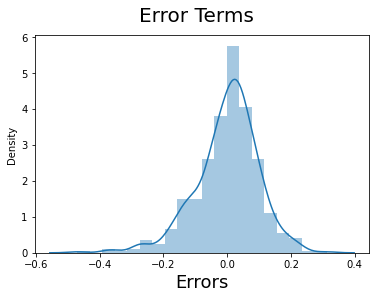

In [126]:
## Let's do residual analysis before testing this final model

y_train_cnt = lm3.predict(X_train_rfe2)

# Histogram of the error terms

figure = plt.figure()

sns.distplot((y_train - y_train_cnt), bins = 20)

# Title

figure.suptitle('Error Terms', fontsize = 20)    

# X-label

plt.xlabel('Errors', fontsize = 18)                

In [ ]:
# Observation: Error terms are normally distributed as seen the the plot above

In [127]:
# Let's predict using latest model.  First let's have a look at X train rfe

X_train_rfe2

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sept,weathersit_grade3
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0


In [133]:
# We need to scale the test set also similar to train set.  
# var is a variable we used earlier to list variables to be scaled for training data

df_test[var] = scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,1,...,0,0,0,0,0,0,1,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,0,...,0,0,0,0,0,1,0,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,0,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,0,...,1,0,0,0,0,0,0,0,1,0


In [134]:
# Now let's split the test dataset into X and y
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [135]:
# View top few rows of X test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tues,weekday_Wed,weathersit_grade2,weathersit_grade3
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [137]:
# varc was the list with 9 variables RFE selected by rfe
varcol2=varc.columns
varcol2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Jul', 'mnth_Sept', 'weathersit_grade3'],
      dtype='object')

In [138]:
# Create a new dataframe X_test_rfe2

X_test_rfe2 = X_test[varcol2]

# Add a constant to test set (statsmodels needs it)

X_test_rfe2 = sm.add_constant(X_test_rfe2)

# Review test set X info

X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              219 non-null    float64
 1   yr                 219 non-null    int64  
 2   holiday            219 non-null    int64  
 3   temp               219 non-null    float64
 4   windspeed          219 non-null    float64
 5   season_spring      219 non-null    uint8  
 6   season_winter      219 non-null    uint8  
 7   mnth_Jul           219 non-null    uint8  
 8   mnth_Sept          219 non-null    uint8  
 9   weathersit_grade3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [139]:
# Let's make prediction using this model
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

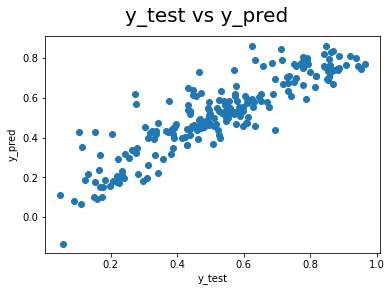

In [140]:
# Scatter plot of y_test and y_pred
# Let's view the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)

# Title

fig.suptitle('y_test vs y_pred', fontsize = 20) 

plt.xlabel('y_test')
plt.ylabel('y_pred')

In [141]:
# Check R squared value for test set

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045293

In [142]:
# Plot above indicates that the model is doing prediction very well for test set also.
# R squared value for test set is 78.8% which is good. 
# R squared for train set was 80.5% & adjusted R squared for train set was 80.1%.

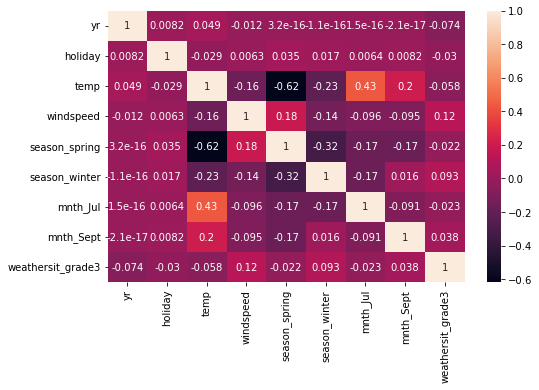

In [143]:
# Let's view correlations between the final selected 9 variables

plt.figure(figsize=(8,5))

sns.heatmap(df[varcol2].corr(), annot=True)

plt.show()

In [ ]:
# Finally selected 9 predictor variables have no strong correlation within themselves

# Answers related to this model are provided in separate pdf document as required.